<a href="https://colab.research.google.com/github/KimSeonHo-719/CV/blob/main/%EA%B3%BC%EC%A0%9C2%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
!wget 'https://raw.githubusercontent.com/KimSeonHo-719/CV/main/gyujin.png' -O gyujin.png

--2025-04-06 05:47:31--  https://raw.githubusercontent.com/KimSeonHo-719/CV/main/gyujin.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222295 (217K) [image/png]
Saving to: ‘gyujin.png’

gyujin.png          100%[===================>] 217.08K  --.-KB/s    in 0.03s   

2025-04-06 05:47:31 (8.20 MB/s) - ‘gyujin.png’ saved [222295/222295]



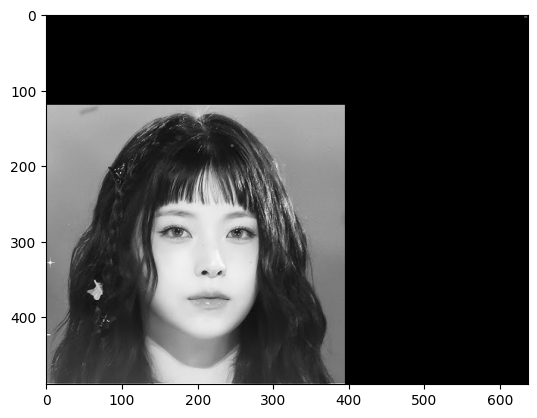

In [33]:
img_BGR=cv2.imread('/content/gyujin.png')
img_GRAY = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2GRAY)
plt.imshow(img_GRAY,cmap='gray')

In [34]:
# Gaussian Filter
def gaussian(size, sigma=1):
    k = size // 2 # 중심 계산
    x, y = np.mgrid[-k:k+1, -k:k+1] # 중심으로부터 x,y 배열을 얻음. if size=3,
     # [[-1, -1, -1],     [[-1, 0, 1],
     # [ 0,  0,  0],       [-1, 0, 1],
     # [ 1,  1,  1]]       [-1, 0, 1]]
     # np.mgrid로 배열을 얻을 수 있다는 것을 처음 알았음.
     # 수작업으로 하다가 컴퓨터비전과 딥러닝(오일석) 책을 보고 알고 다시 하였음.
    g = np.exp(-(x**2 + y**2) / (2*sigma**2)) # 2차원 가우시안 공식
    return g / g.sum() # 정규화

# Convolution - 과제1.ipynb(Average Filter)에 주석을 달아놓았으므로 생략하겠음.
def conv(img, kernel):
    h, w = kernel.shape
    img_h, img_w = h//2, w//2

    padding=np.pad(img,((img_h,img_h),(img_w,img_w)),mode='reflect')
    output=np.zeros_like(img,dtype=np.float32)

    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        region=padding[i:i+h,j:j+w]
        output[i,j]=np.sum(region*kernel)

    return output

In [35]:
kernel33=gaussian(3,1)
conv(img_GRAY,kernel33)
kernel55=gaussian(5,1)
conv(img_GRAY,kernel55)
kernel77=gaussian(7,1)
conv(img_GRAY,kernel77)
kernel15=gaussian(15,1)
conv(img_GRAY,kernel15)

array([[  0.      ,   0.      ,   0.      , ...,  49.217735,  39.45009 ,
         31.209698],
       [  0.      ,   0.      ,   0.      , ...,  62.19711 ,  49.859802,
         39.445625],
       [  0.      ,   0.      ,   0.      , ...,  77.5042  ,  62.13885 ,
         49.159885],
       ...,
       [133.41205 , 131.79633 , 128.27487 , ...,   0.      ,   0.      ,
          0.      ],
       [149.83073 , 147.81273 , 144.18047 , ...,   0.      ,   0.      ,
          0.      ],
       [165.4817  , 163.4298  , 159.64853 , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)

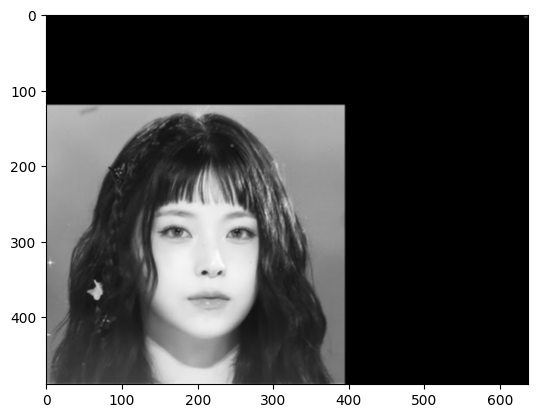

In [36]:
result33=conv(img_GRAY,kernel33)
plt.imshow(result33,cmap='gray')

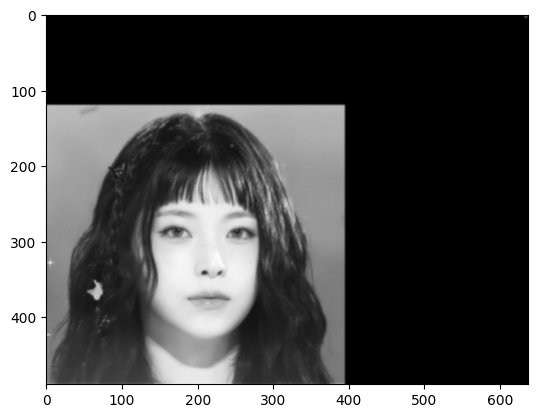

In [37]:
result55=conv(img_GRAY,kernel55)
plt.imshow(result55,cmap='gray')

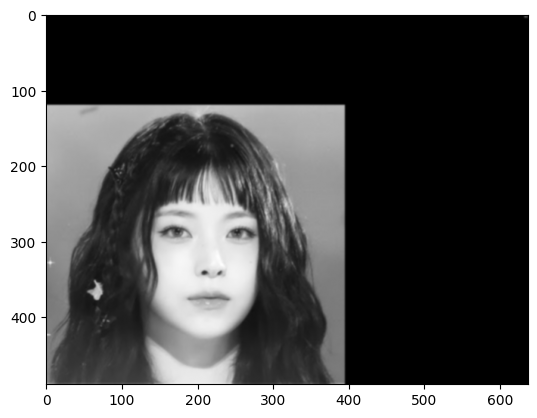

In [38]:
result77=conv(img_GRAY,kernel77)
plt.imshow(result77,cmap='gray')

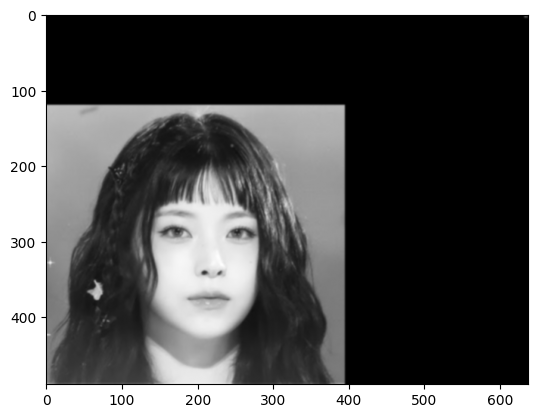

In [39]:
# 커널 사이즈가 증가함에 따라 잔머리 등이 잘 보이지 않는다.
result15=conv(img_GRAY,kernel15)
plt.imshow(result15,cmap='gray')

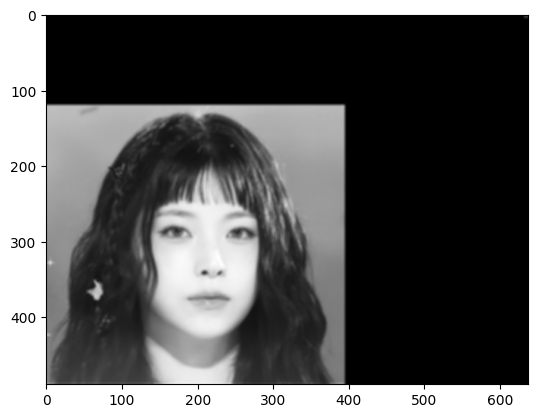

In [40]:
# 과제3. 5x5 Gaussian Filter에 sigma 값 변화시켜보기
kernel55_2=gaussian(5,2)
conv(img_GRAY,kernel55_2)
result55_2=conv(img_GRAY,kernel55_2)
plt.imshow(result55_2,cmap='gray')

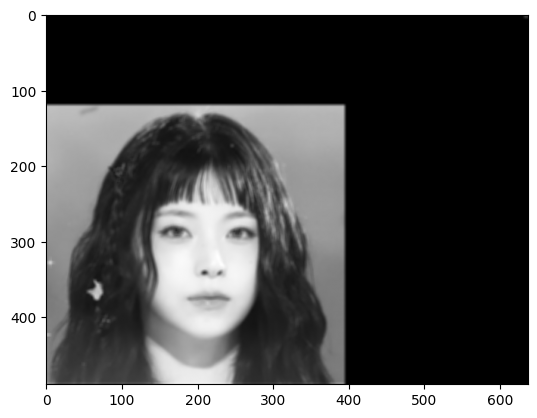

In [41]:
# 시그마 값이 커지면서 Average Filter처럼 화면이 뿌얘지는 것을 볼 수 있다.
kernel55_3=gaussian(5,3)
conv(img_GRAY,kernel55_3)
result55_3=conv(img_GRAY,kernel55_3)
plt.imshow(result55_3,cmap='gray')

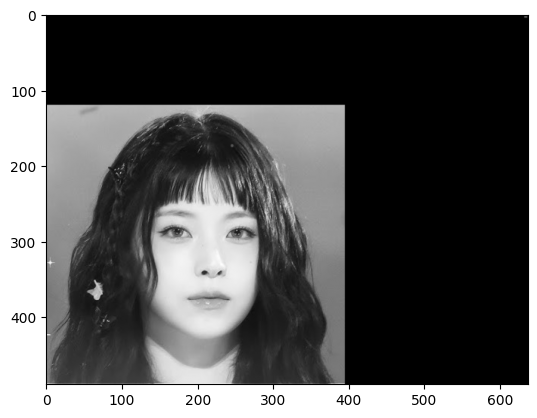

In [43]:
# 시그마 값이 0.5까지 작아지면 원본과 비슷하긴 하다. 하지만 약간의 smoothing이 있는 것으로 보인다.
kernel55_05=gaussian(5,0.5)
conv(img_GRAY,kernel55_05)
result55_05=conv(img_GRAY,kernel55_05)
plt.imshow(result55_05,cmap='gray')

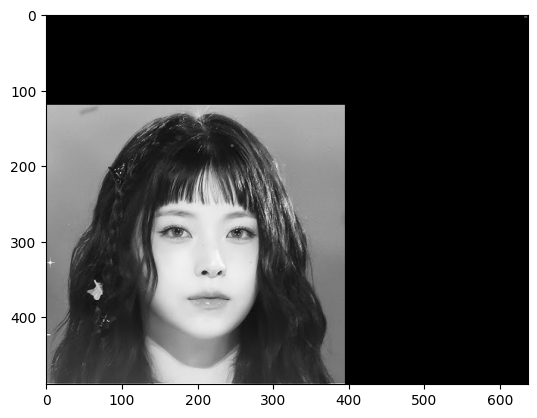

In [42]:
# 시그마 값이 0.1이 되자 원본보다도 더 화질이 좋아진 것 같다.
kernel55_01=gaussian(5,0.1)
conv(img_GRAY,kernel55_01)
result55_01=conv(img_GRAY,kernel55_01)
plt.imshow(result55_01,cmap='gray')